In [1]:
import pandas as pd
import sklearn

pt_info_clean = pd.read_csv("../data/interim/pt_info_clean.csv")

In [2]:
pt_info_clean.sample(5)

,Unnamed: 0,mrsa_positive,MITRAL REGURGITATION,ABDOMINAL PAIN,ABSCESS,ACUTE CHOLANGITIS,ACUTE CHOLECYSTITIS,ACUTE PULMONARY EMBOLISM,ACUTE RENAL FAILURE,ACUTE RESPIRATORY DISTRESS SYNDROME,...,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_WHITE,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,admission_location_CLINIC REFERRAL/PREMATURE,admission_location_EMERGENCY ROOM ADMIT,admission_location_PHYS REFERRAL/NORMAL DELI,admission_location_TRANSFER FROM HOSP/EXTRAM,admission_location_TRANSFER FROM SKILLED NUR
132,132,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
58,58,0.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
60,60,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
39,39,0.0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
85,85,1.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


We begin by splitting the data into 2 sets:

- `train`: a set of feature vectors which will be used to train the model

- `test`:  a set of feature vectors which will be used to evaluate the model we trained

In [19]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(pt_info_clean, 
                                                                    pt_info_clean["mrsa_positive"],  
                                                                    test_size=0.2, 
                                                                    random_state=430)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [21]:
predictions = model.predict(x_test)

[[20  0]
 [ 2  7]]


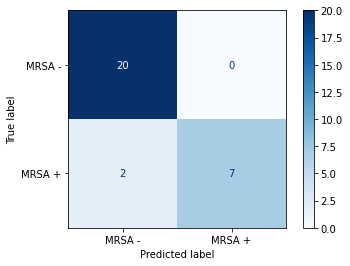

In [22]:
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['MRSA -', 'MRSA +']
                  
disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(disp.confusion_matrix)

In [11]:
plt.savefig('../reports/figures/logistic_confusion_matrix.png')

<Figure size 432x288 with 0 Axes>

In [12]:
![]('../reports/figures/logistic_confusion_matrix.png')

zsh:1: missing delimiter for 'g' glob qualifier


We want to save the model so that we can use it outside of this notebook.

In [ ]:
model

In [ ]:
from mlworkflows import util
util.serialize_to(model, "../models/logistic_model.sav")

In [9]:
from mlworkflows import plot
import altair
df, chart = plot.binary_confusion_matrix(y_test, predictions)
chart

ModuleNotFoundError: No module named 'altair'